<a href="https://www.kaggle.com/code/anacpricciardi/notebookf03e1cba5c?scriptVersionId=215021055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Health and Sleep Data Analysis

Good sleep is a crucial part of overall health and can significantly impact individual well-being. Analyzing health and sleep data aims to explore how sleep patterns affect general health. By examining sleep quality and its relationship with health factors such as energy levels and mood, we can provide insights to help improve sleep quality and enhance overall health.

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reading the dataset

In [2]:
df=pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


# Information about the data

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [4]:
df.max()

User ID                          100
Age                               50
Gender                             m
Sleep Quality                      9
Bedtime                        23:45
Wake-up Time                   07:30
Daily Steps                    11000
Calories Burned                 2900
Physical Activity Level       medium
Dietary Habits             unhealthy
Sleep Disorders                  yes
Medication Usage                 yes
dtype: object

In [5]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(100, 12)

In [8]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

#  The effect of age on sleep quality

In [9]:
print(df[['Age', 'Sleep Quality']].isnull().sum())

Age              0
Sleep Quality    0
dtype: int64


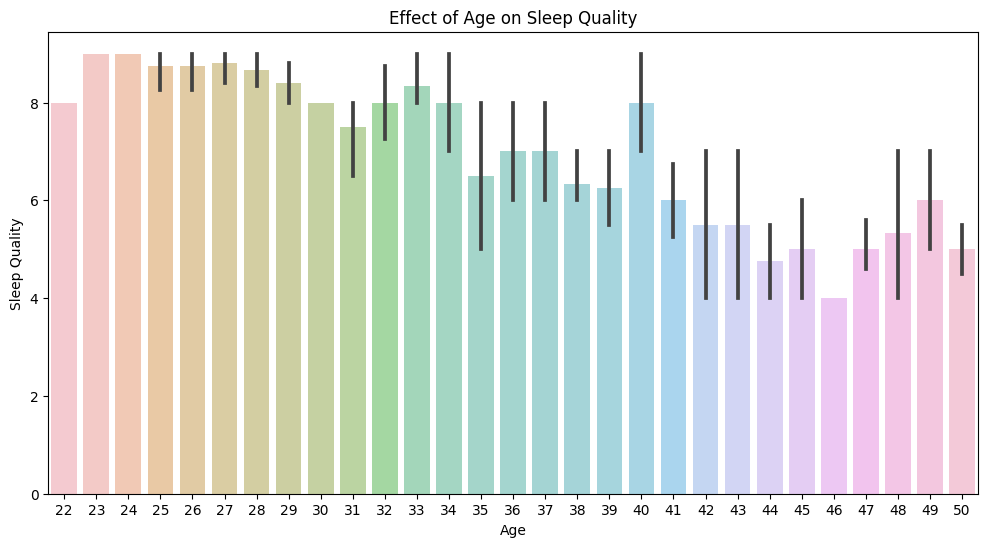

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Effect of Age on Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

In [11]:
age_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr().iloc[0, 1]
print(f'Correlation coefficient between Age and Sleep Quality: {age_sleep_quality_corr:.2f}')

Correlation coefficient between Age and Sleep Quality: -0.85


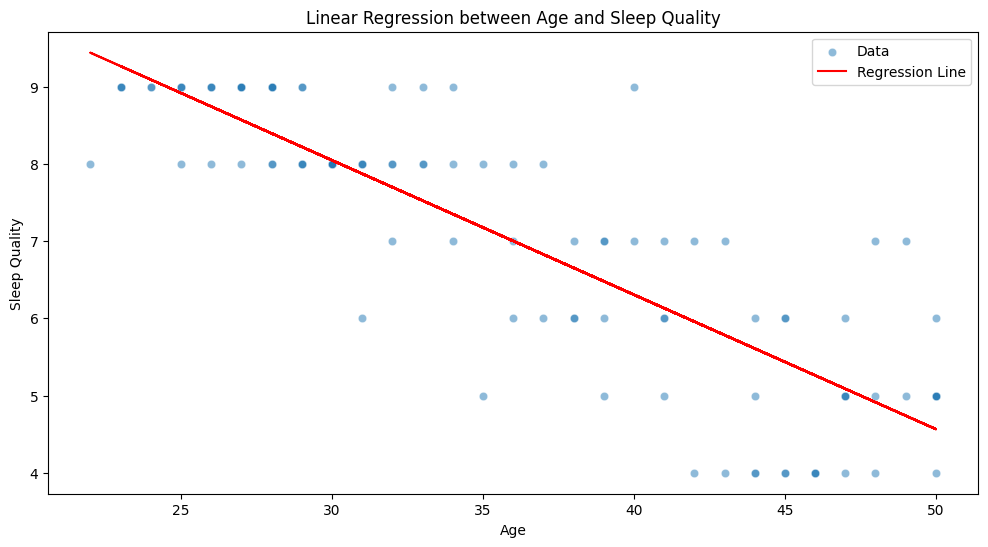

Regression coefficient: -0.17
Intercept: 13.27


In [12]:
df_clean = df.dropna(subset=['Age', 'Sleep Quality'])

X = df_clean[['Age']]
y = df_clean['Sleep Quality']

model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sleep Quality', data=df_clean, alpha=0.5, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression between Age and Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()

print(f'Regression coefficient: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')


# Compare sleep quality and physical activity level between males and females.

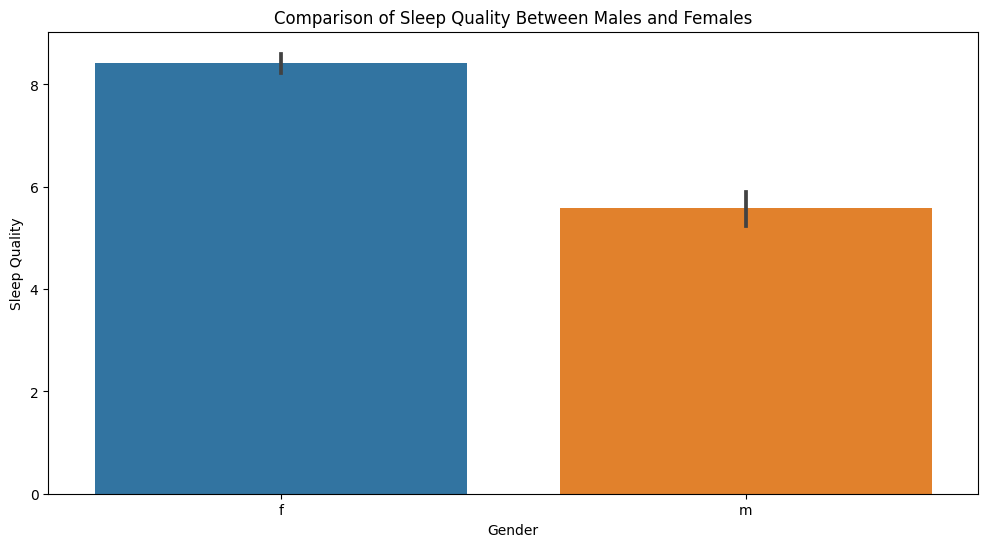

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Sleep Quality', data=df)
plt.title('Comparison of Sleep Quality Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

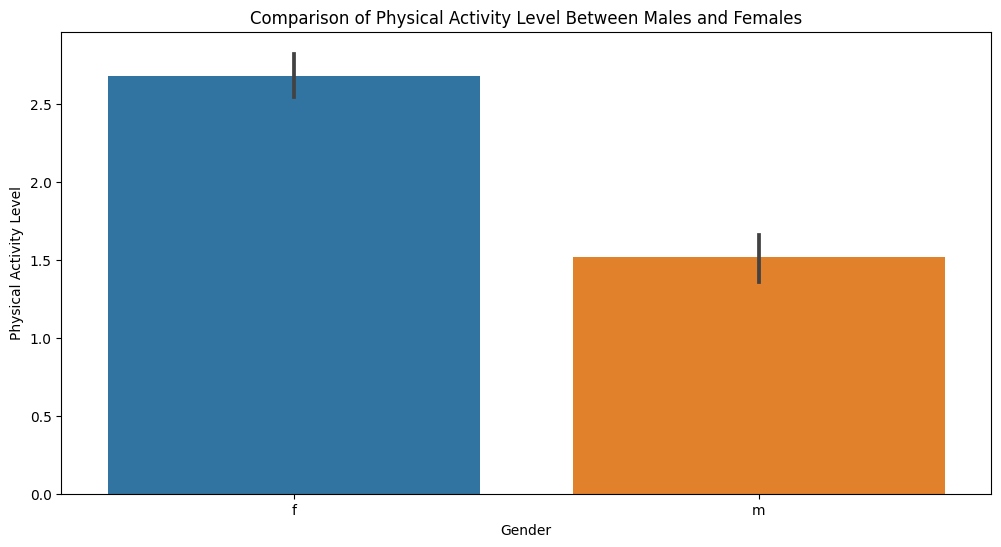

In [14]:
activity_levels = {'low': 1, 'medium': 2, 'high': 3}
df['Physical Activity Level Numeric'] = df['Physical Activity Level'].map(activity_levels)

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level Numeric', data=df)
plt.title('Comparison of Physical Activity Level Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

In [15]:
male_sleep_quality = df[df['Gender'] == 'm']['Sleep Quality']
female_sleep_quality = df[df['Gender'] == 'f']['Sleep Quality']

t_stat_sleep_quality, p_val_sleep_quality = stats.ttest_ind(male_sleep_quality, female_sleep_quality, nan_policy='omit')
print(f'T-statistic for Sleep Quality: {t_stat_sleep_quality:.2f}')
print(f'P-value for Sleep Quality: {p_val_sleep_quality:.4f}')

male_activity_level = df[df['Gender'] == 'm']['Physical Activity Level Numeric']
female_activity_level = df[df['Gender'] == 'f']['Physical Activity Level Numeric']

t_stat_activity_level, p_val_activity_level = stats.ttest_ind(male_activity_level, female_activity_level, nan_policy='omit')
print(f'T-statistic for Physical Activity Level: {t_stat_activity_level:.2f}')
print(f'P-value for Physical Activity Level: {p_val_activity_level:.4f}')


T-statistic for Sleep Quality: -14.32
P-value for Sleep Quality: 0.0000
T-statistic for Physical Activity Level: -10.98
P-value for Physical Activity Level: 0.0000


# Analyze how the timing of sleep and wakefulness affects sleep quality.

In [16]:
def time_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60

df['Bedtime Hours'] = df['Bedtime'].apply(time_to_hours)
df['Wake-up Hours'] = df['Wake-up Time'].apply(time_to_hours)

# Calculate sleep duration in hours
df['Sleep Duration Hours'] = (df['Wake-up Hours'] - df['Bedtime Hours']) % 24

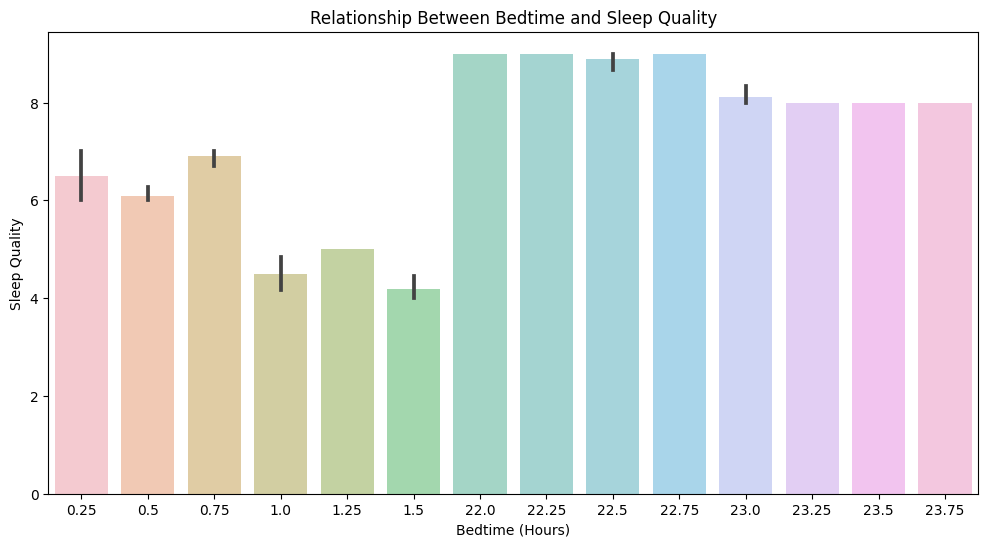

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Bedtime Hours', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Relationship Between Bedtime and Sleep Quality')
plt.xlabel('Bedtime (Hours)')
plt.ylabel('Sleep Quality')
plt.show()

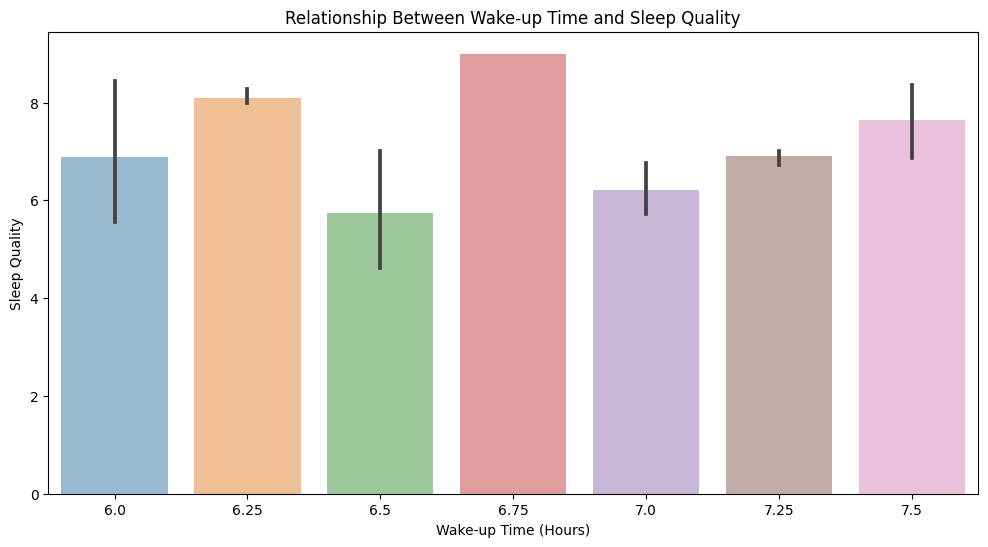

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Wake-up Hours', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Relationship Between Wake-up Time and Sleep Quality')
plt.xlabel('Wake-up Time (Hours)')
plt.ylabel('Sleep Quality')
plt.show()

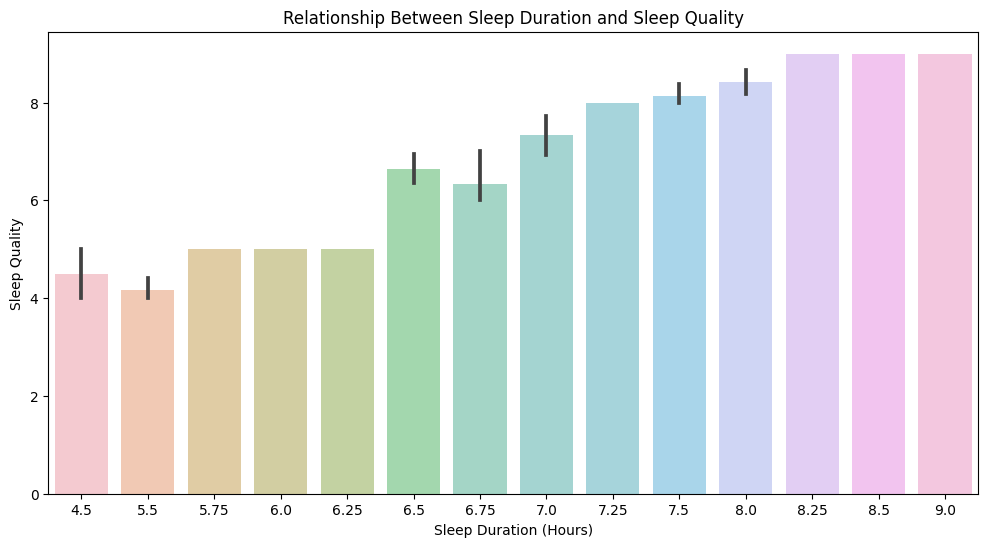

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sleep Duration Hours', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Relationship Between Sleep Duration and Sleep Quality')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Sleep Quality')
plt.show()

In [20]:
df_bedtime = df[['Bedtime Hours', 'Sleep Quality']].dropna()
X_bedtime = df_bedtime[['Bedtime Hours']]
y_bedtime = df_bedtime['Sleep Quality']

model_bedtime = LinearRegression()
model_bedtime.fit(X_bedtime, y_bedtime)
y_pred_bedtime = model_bedtime.predict(X_bedtime)

print(f'R-squared for Bedtime Model: {r2_score(y_bedtime, y_pred_bedtime):.2f}')


R-squared for Bedtime Model: 0.73


In [21]:
df_wakeup = df[['Wake-up Hours', 'Sleep Quality']].dropna()
X_wakeup = df_wakeup[['Wake-up Hours']]
y_wakeup = df_wakeup['Sleep Quality']

model_wakeup = LinearRegression()
model_wakeup.fit(X_wakeup, y_wakeup)
y_pred_wakeup = model_wakeup.predict(X_wakeup)

print(f'R-squared for Wake-up Time Model: {r2_score(y_wakeup, y_pred_wakeup):.2f}')

R-squared for Wake-up Time Model: 0.00


In [22]:
df_sleep_duration = df[['Sleep Duration Hours', 'Sleep Quality']].dropna()
X_sleep_duration = df_sleep_duration[['Sleep Duration Hours']]
y_sleep_duration = df_sleep_duration['Sleep Quality']

model_sleep_duration = LinearRegression()
model_sleep_duration.fit(X_sleep_duration, y_sleep_duration)
y_pred_sleep_duration = model_sleep_duration.predict(X_sleep_duration)

print(f'R-squared for Sleep Duration Model: {r2_score(y_sleep_duration, y_pred_sleep_duration):.2f}')


R-squared for Sleep Duration Model: 0.84


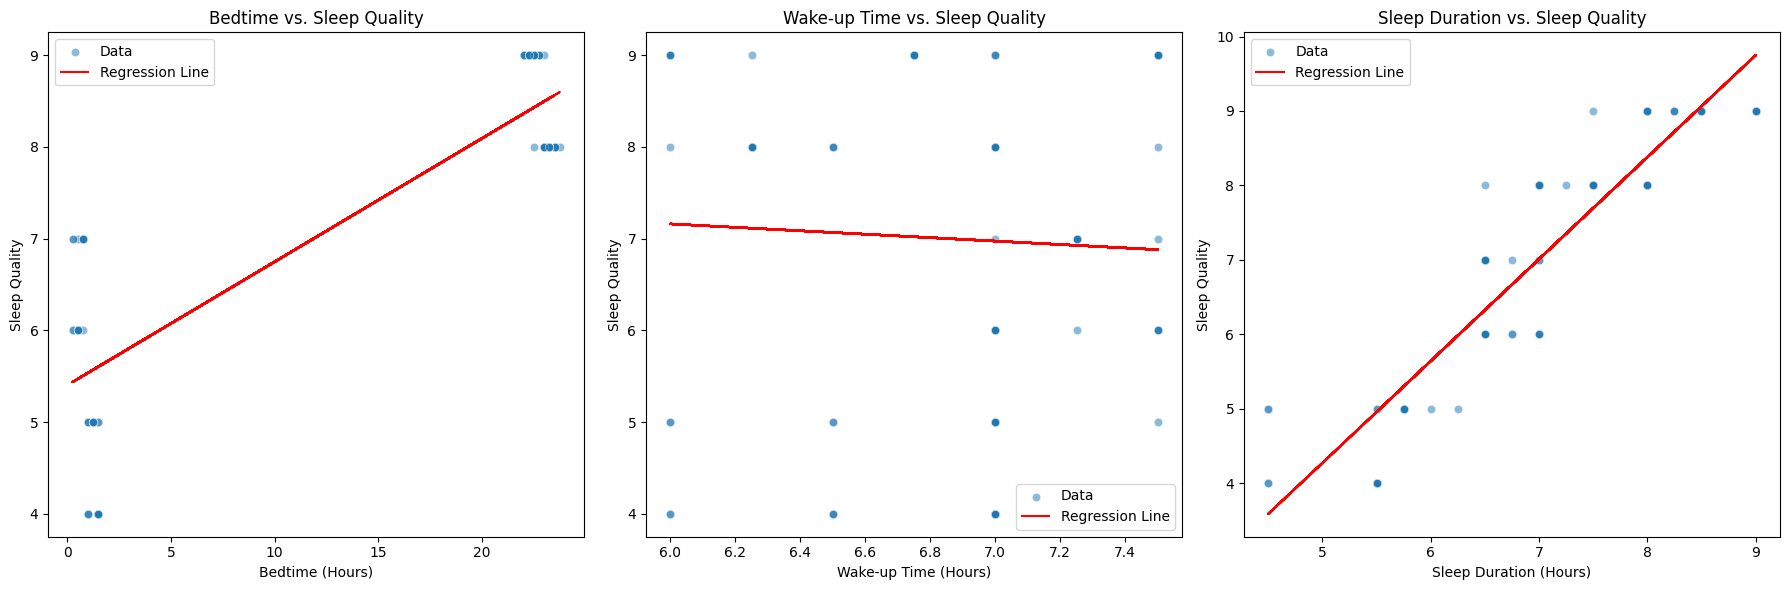

In [23]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Bedtime Hours', y='Sleep Quality', data=df, alpha=0.5, label='Data')
plt.plot(df_bedtime[['Bedtime Hours']], y_pred_bedtime, color='red', label='Regression Line')
plt.title('Bedtime vs. Sleep Quality')
plt.xlabel('Bedtime (Hours)')
plt.ylabel('Sleep Quality')
plt.legend()


plt.subplot(1, 3, 2)
sns.scatterplot(x='Wake-up Hours', y='Sleep Quality', data=df, alpha=0.5, label='Data')
plt.plot(df_wakeup[['Wake-up Hours']], y_pred_wakeup, color='red', label='Regression Line')
plt.title('Wake-up Time vs. Sleep Quality')
plt.xlabel('Wake-up Time (Hours)')
plt.ylabel('Sleep Quality')
plt.legend()

plt.subplot(1, 3, 3)
sns.scatterplot(x='Sleep Duration Hours', y='Sleep Quality', data=df, alpha=0.5, label='Data')
plt.plot(df_sleep_duration[['Sleep Duration Hours']], y_pred_sleep_duration, color='red', label='Regression Line')
plt.title('Sleep Duration vs. Sleep Quality')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Sleep Quality')
plt.legend()

plt.tight_layout()
plt.show()

# Determine whether different levels of physical activity affect sleep quality.

In [24]:
summary = df.groupby('Physical Activity Level')['Sleep Quality'].describe()
print(summary)

                         count      mean       std  min  25%  50%  75%  max
Physical Activity Level                                                    
high                      36.0  8.555556  0.503953  8.0  8.0  9.0  9.0  9.0
low                       26.0  4.615385  0.697247  4.0  4.0  5.0  5.0  7.0
medium                    38.0  7.157895  1.053343  6.0  6.0  7.0  8.0  9.0


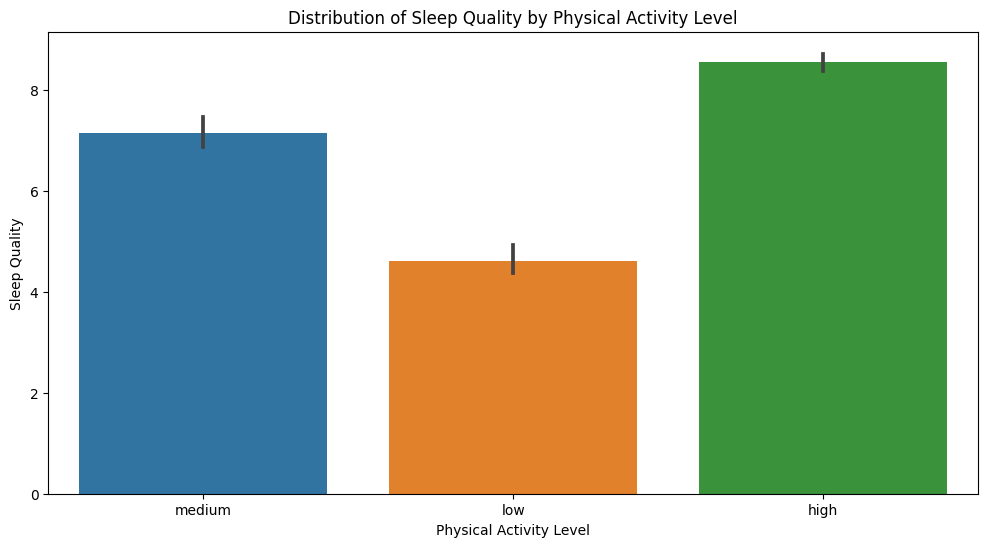

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Physical Activity Level', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality')
plt.show()

In [26]:
grouped_data = [df[df['Physical Activity Level'] == level]['Sleep Quality'] for level in df['Physical Activity Level'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

ANOVA F-statistic: 184.25
ANOVA p-value: 0.0000


# Examine how the amount of calories burned per day affects sleep quality.

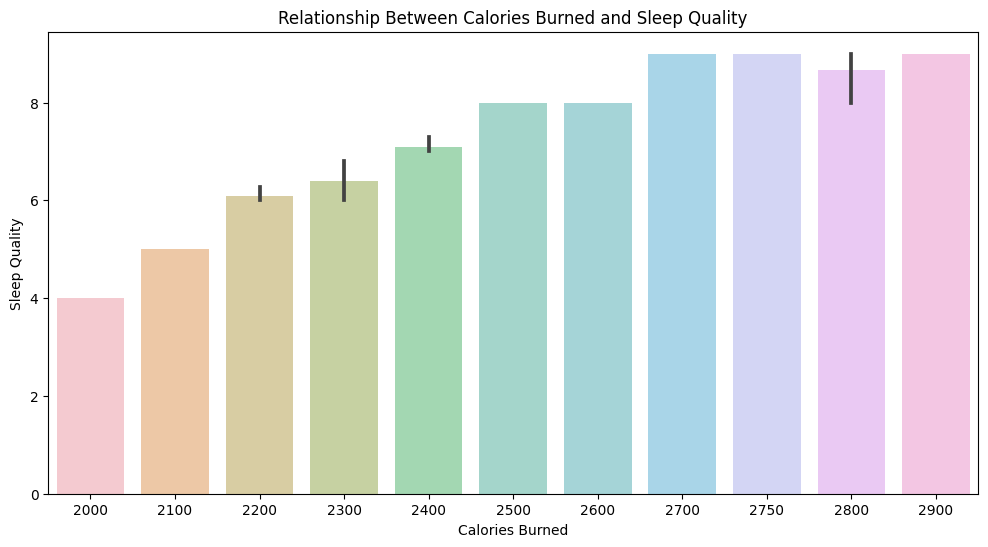

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Calories Burned', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Relationship Between Calories Burned and Sleep Quality')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Quality')
plt.show()

In [28]:
df_reg = df[['Calories Burned', 'Sleep Quality']].dropna()
X_calories = df_reg[['Calories Burned']]
y_sleep_quality = df_reg['Sleep Quality']

model_calories = LinearRegression()
model_calories.fit(X_calories, y_sleep_quality)
y_pred_calories = model_calories.predict(X_calories)

print(f'R-squared for Calories Burned Model: {r2_score(y_sleep_quality, y_pred_calories):.2f}')

R-squared for Calories Burned Model: 0.95


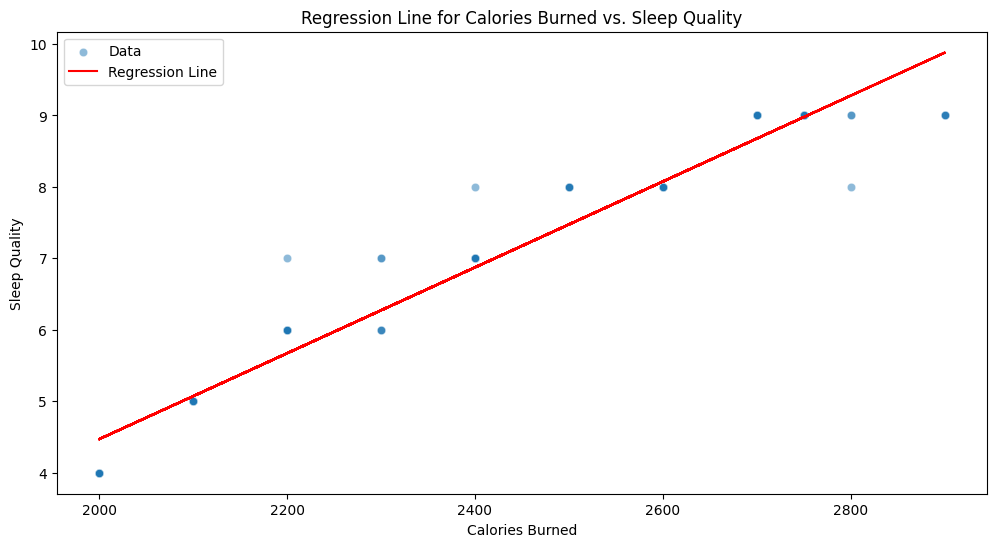

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Calories Burned', y='Sleep Quality', data=df, alpha=0.5, label='Data')
plt.plot(df_reg[['Calories Burned']], y_pred_calories, color='red', label='Regression Line')
plt.title('Regression Line for Calories Burned vs. Sleep Quality')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()


# Analyze the impact of dietary habits on sleep quality.

In [30]:
summary = df.groupby('Dietary Habits')['Sleep Quality'].describe()
print(summary)

                count      mean       std  min  25%  50%  75%  max
Dietary Habits                                                    
healthy          29.0  8.862069  0.350931  8.0  9.0  9.0  9.0  9.0
medium           30.0  7.700000  0.466092  7.0  7.0  8.0  8.0  8.0
unhealthy        41.0  5.170732  0.946109  4.0  4.0  5.0  6.0  7.0


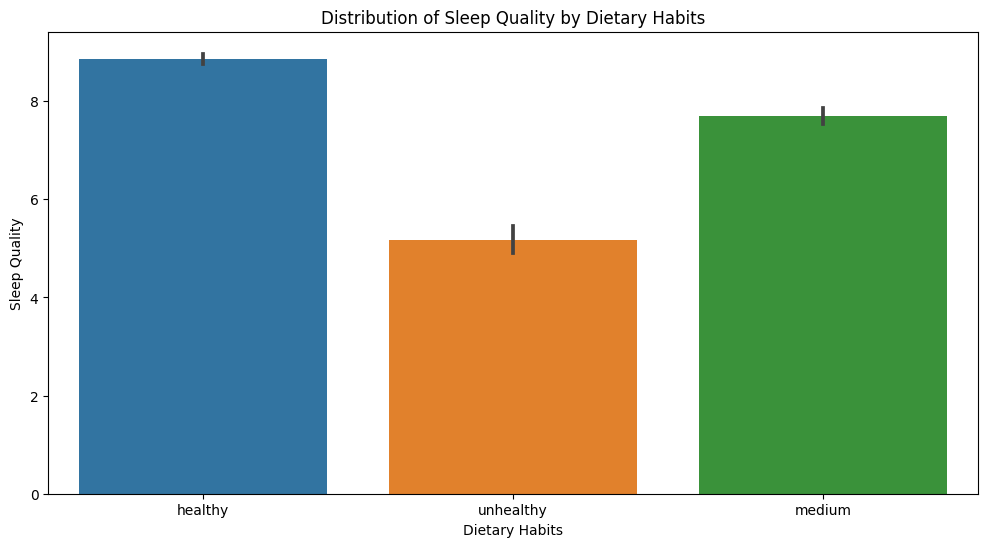

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Sleep Quality')
plt.show()

In [32]:
grouped_data = [df[df['Dietary Habits'] == habit]['Sleep Quality'] for habit in df['Dietary Habits'].unique()]

f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

ANOVA F-statistic: 268.78
ANOVA p-value: 0.0000


# Study how sleep disorders affect sleep quality and physical activity level.

In [33]:
summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(summary)

                Sleep Quality               Physical Activity Level
                         mean       std                    <lambda>
Sleep Disorders                                                    
no                   7.837838  1.085736  {'medium': 38, 'high': 36}
yes                  4.615385  0.697247                 {'low': 26}


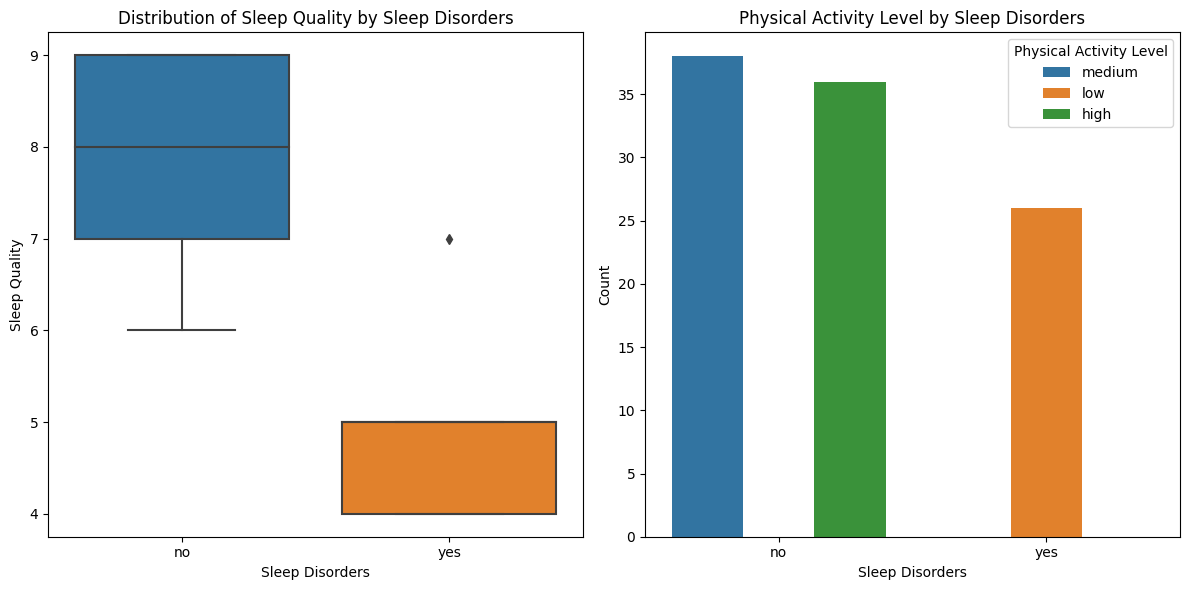

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')

plt.subplot(1, 2, 2)
sns.countplot(x='Sleep Disorders', hue='Physical Activity Level', data=df)
plt.title('Physical Activity Level by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [35]:
sleep_disorders_quality = df[df['Sleep Disorders'] == 'yes']['Sleep Quality']
no_sleep_disorders_quality = df[df['Sleep Disorders'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(sleep_disorders_quality, no_sleep_disorders_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -17.32
p-value: 0.0000


In [36]:
df['Physical Activity Level Code'] = df['Physical Activity Level'].map({'low': 1, 'medium': 2, 'high': 3})

grouped_data_activity = [df[df['Sleep Disorders'] == 'yes']['Physical Activity Level Code'],
                         df[df['Sleep Disorders'] == 'no']['Physical Activity Level Code']]


f_statistic_activity, p_value_activity = stats.f_oneway(*grouped_data_activity)
print(f'ANOVA F-statistic for Physical Activity Level: {f_statistic_activity:.2f}')
print(f'ANOVA p-value: {p_value_activity:.4f}')

ANOVA F-statistic for Physical Activity Level: 225.37
ANOVA p-value: 0.0000


# Examine the relationship between medication use and sleep quality.

In [37]:
summary = df.groupby('Medication Usage')['Sleep Quality'].describe()
print(summary)

                  count  mean       std  min  25%  50%  75%  max
Medication Usage                                                
no                 80.0   7.5  1.475539  4.0  6.0  8.0  9.0  9.0
yes                20.0   5.0  1.169795  4.0  4.0  4.5  6.0  7.0


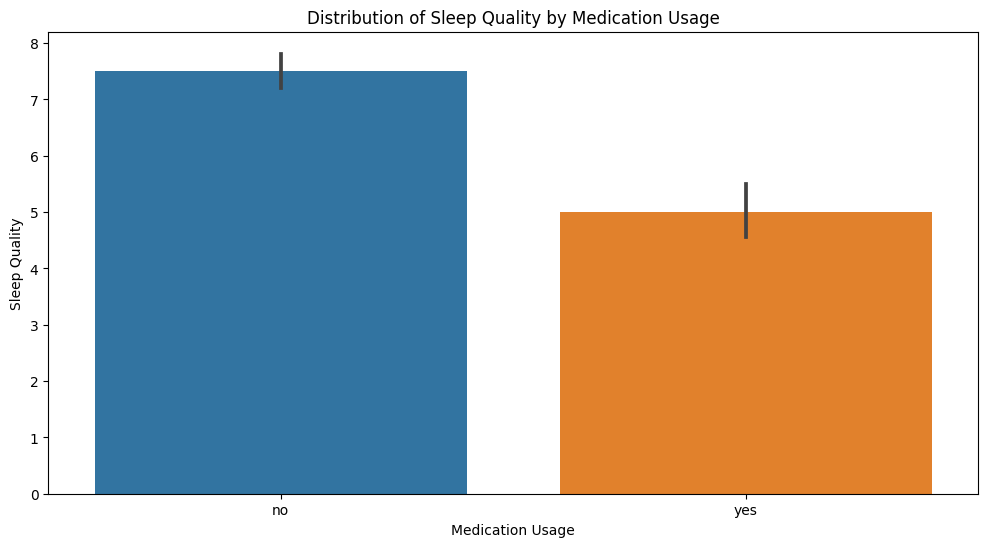

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Medication Usage')
plt.xlabel('Medication Usage')
plt.ylabel('Sleep Quality')
plt.show()

In [39]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


# Analyze the relationship between sleep duration and sleep quality.

In [40]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M').dt.hour + pd.to_datetime(df['Bedtime'], format='%H:%M').dt.minute / 60
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%H:%M').dt.hour + pd.to_datetime(df['Wake-up Time'], format='%H:%M').dt.minute / 60

df['Sleep Duration'] = df['Wake-up Time'] - df['Bedtime']
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x + 24 if x < 0 else x)

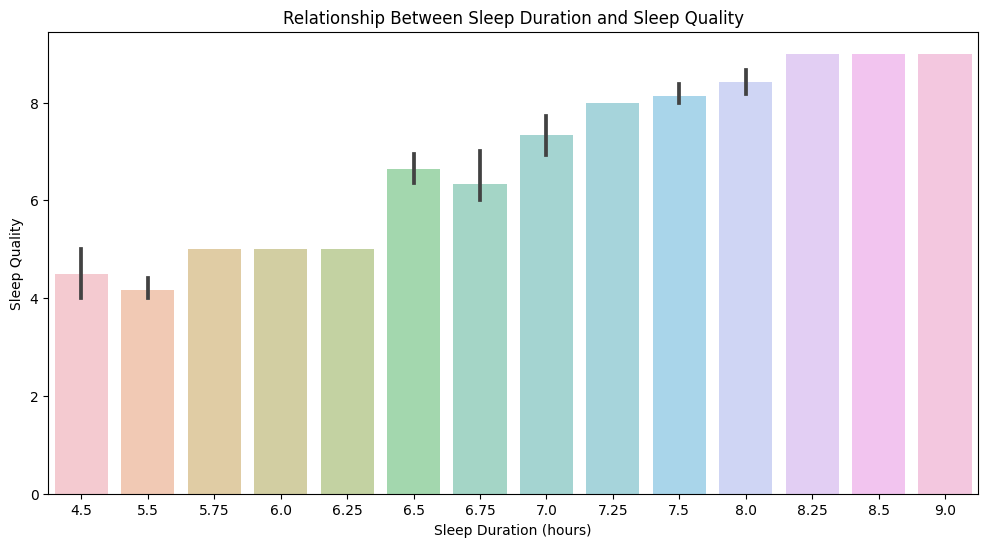

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sleep Duration', y='Sleep Quality', data=df, alpha=0.5)
plt.title('Relationship Between Sleep Duration and Sleep Quality')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality')
plt.show()

In [42]:
df_reg = df[['Sleep Duration', 'Sleep Quality']].dropna()
X_sleep_duration = df_reg[['Sleep Duration']]
y_sleep_quality = df_reg['Sleep Quality']

model_sleep_duration = LinearRegression()
model_sleep_duration.fit(X_sleep_duration, y_sleep_quality)
y_pred_sleep_duration = model_sleep_duration.predict(X_sleep_duration)

print(f'R-squared for Sleep Duration Model: {r2_score(y_sleep_quality, y_pred_sleep_duration):.2f}')

R-squared for Sleep Duration Model: 0.84


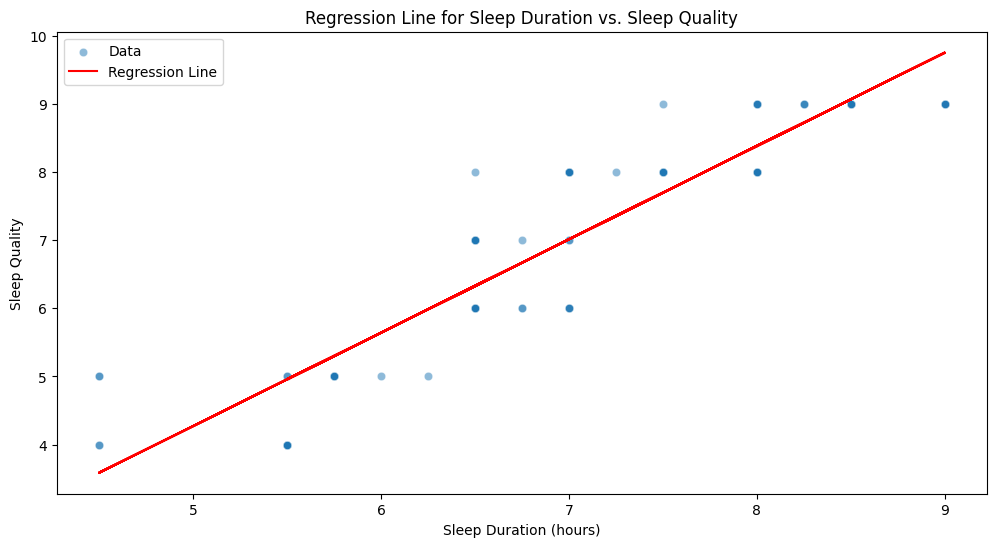

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep Duration', y='Sleep Quality', data=df, alpha=0.5, label='Data')
plt.plot(df_reg[['Sleep Duration']], y_pred_sleep_duration, color='red', label='Regression Line')
plt.title('Regression Line for Sleep Duration vs. Sleep Quality')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()

#  What factors most affect overall sleep quality?

In [44]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
print(correlation_matrix['Sleep Quality'].sort_values(ascending=False))

Sleep Quality                      1.000000
Daily Steps                        0.976277
Calories Burned                    0.973557
Sleep Duration Hours               0.918909
Sleep Duration                     0.918909
Physical Activity Level Numeric    0.875203
Physical Activity Level Code       0.875203
Bedtime                            0.853312
Bedtime Hours                      0.853312
User ID                           -0.014248
Wake-up Time                      -0.048526
Wake-up Hours                     -0.048526
Age                               -0.848356
Name: Sleep Quality, dtype: float64


In [45]:
df['Gender Code'] = df['Gender'].map({'f': 0, 'm': 1})
df['Physical Activity Level Code'] = df['Physical Activity Level'].map({'low': 1, 'medium': 2, 'high': 3})
df['Dietary Habits Code'] = df['Dietary Habits'].map({'healthy': 1, 'medium': 2, 'unhealthy': 3})
df['Sleep Disorders Code'] = df['Sleep Disorders'].map({'no': 0, 'yes': 1})
df['Medication Usage Code'] = df['Medication Usage'].map({'no': 0, 'yes': 1})


numeric_df = df[['Age', 'Daily Steps', 'Calories Burned', 'Physical Activity Level Code', 
                 'Dietary Habits Code', 'Sleep Duration', 'Sleep Quality', 
                 'Sleep Disorders Code', 'Medication Usage Code']]

correlation_matrix = numeric_df.corr()
print(correlation_matrix['Sleep Quality'].sort_values(ascending=False))


Sleep Quality                   1.000000
Daily Steps                     0.976277
Calories Burned                 0.973557
Sleep Duration                  0.918909
Physical Activity Level Code    0.875203
Medication Usage Code          -0.579284
Sleep Disorders Code           -0.818806
Age                            -0.848356
Dietary Habits Code            -0.902498
Name: Sleep Quality, dtype: float64


In [46]:
X = numeric_df.drop(columns=['Sleep Quality'])
y = numeric_df['Sleep Quality']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f'R-squared for Multiple Regression Model: {r2_score(y, y_pred):.2f}')
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

R-squared for Multiple Regression Model: 0.97
                              Coefficient
Age                              0.005576
Daily Steps                      0.000300
Calories Burned                  0.001421
Physical Activity Level Code    -0.048284
Dietary Habits Code             -0.200860
Sleep Duration                   0.265800
Sleep Disorders Code            -0.483334
Medication Usage Code           -0.122973


<Figure size 1200x600 with 0 Axes>

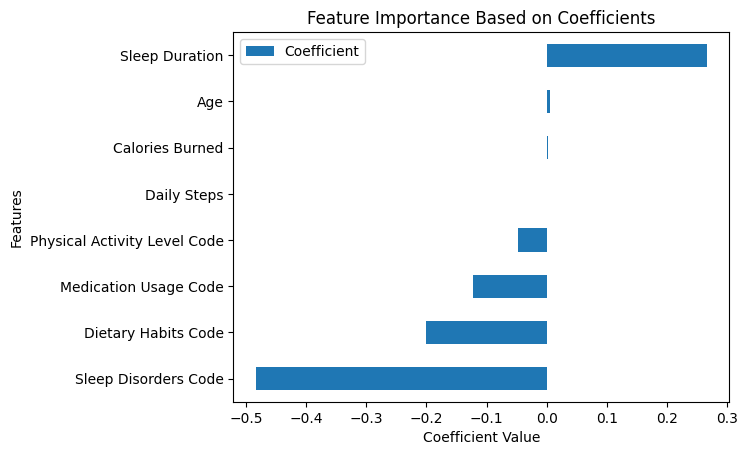

In [47]:
plt.figure(figsize=(12, 6))
coefficients.sort_values(by='Coefficient').plot(kind='barh')
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Thank you very, very much for watching the entire project, I hope you like it.